## Load Data

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('data/ff51b305-b595-4bca-be44-87f5778b0d8d.xlsx')
df

,DATE,품목,품종,거래단위,등급,평균가격,전일,전년
0,2025-11-24,토마토,토마토,5kg,상품,25400.0,-,-
1,2025-11-24,토마토,토마토,5kg,중품,22600.0,-,-
2,2025-11-24,토마토,토마토(전체),5kg,상품,25400.0,-,-
3,2025-11-24,토마토,토마토(전체),5kg,중품,22600.0,-,-
4,2025-11-21,토마토,토마토,5kg,상품,26260.0,26620,-
...,...,...,...,...,...,...,...,...
15627,2010-01-05,토마토,토마토(전체),10kg,중품,25400.0,24800,18600
15628,2010-01-04,토마토,토마토,10kg,상품,28400.0,-,-
15629,2010-01-04,토마토,토마토,10kg,중품,24800.0,-,-
15630,2010-01-04,토마토,토마토(전체),10kg,상품,28400.0,-,-


In [2]:
## in 거래단위 delete 'kg' and convert to numeric and create new column as price_per_kg with 평균가격/거래단위
df['거래단위'] = df['거래단위'].str.replace('kg', '').astype(float)
df['price_per_kg'] = df['평균가격'] / df['거래단위']
df 

,DATE,품목,품종,거래단위,등급,평균가격,전일,전년,price_per_kg
0,2025-11-24,토마토,토마토,5.0,상품,25400.0,-,-,5080.0
1,2025-11-24,토마토,토마토,5.0,중품,22600.0,-,-,4520.0
2,2025-11-24,토마토,토마토(전체),5.0,상품,25400.0,-,-,5080.0
3,2025-11-24,토마토,토마토(전체),5.0,중품,22600.0,-,-,4520.0
4,2025-11-21,토마토,토마토,5.0,상품,26260.0,26620,-,5252.0
...,...,...,...,...,...,...,...,...,...
15627,2010-01-05,토마토,토마토(전체),10.0,중품,25400.0,24800,18600,2540.0
15628,2010-01-04,토마토,토마토,10.0,상품,28400.0,-,-,2840.0
15629,2010-01-04,토마토,토마토,10.0,중품,24800.0,-,-,2480.0
15630,2010-01-04,토마토,토마토(전체),10.0,상품,28400.0,-,-,2840.0


In [3]:
df.columns

Index(['DATE', '품목', '품종', '거래단위', '등급', '평균가격', '전일', '전년', 'price_per_kg'], dtype='object')

In [4]:
df_clean = df.drop(columns=['품목', '품종', '거래단위', '등급', '평균가격', '전일', '전년'])
df_clean

,DATE,price_per_kg
0,2025-11-24,5080.0
1,2025-11-24,4520.0
2,2025-11-24,5080.0
3,2025-11-24,4520.0
4,2025-11-21,5252.0
...,...,...
15627,2010-01-05,2540.0
15628,2010-01-04,2840.0
15629,2010-01-04,2480.0
15630,2010-01-04,2840.0


In [5]:
## resample the price by daily 
df_clean = df_clean.resample('D', on='DATE').mean()
df_clean

,price_per_kg
DATE,
2010-01-04,2660.0
2010-01-05,2720.0
2010-01-06,2680.0
2010-01-07,2670.0
2010-01-08,2640.0
...,...
2025-11-20,5012.0
2025-11-21,4940.0
2025-11-22,NaN


In [6]:
## fill missing dates with forward fill
df_clean = df_clean.ffill()
df_clean

,price_per_kg
DATE,
2010-01-04,2660.0
2010-01-05,2720.0
2010-01-06,2680.0
2010-01-07,2670.0
2010-01-08,2640.0
...,...
2025-11-20,5012.0
2025-11-21,4940.0
2025-11-22,4940.0


In [7]:
## check line plot using plotly go
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_clean.index, y=df_clean['price_per_kg'], mode='lines', name='Price per kg'))
fig.update_layout(title='Price per kg over Time', xaxis_title='Date', yaxis_title='Price per kg')
fig.show()

In [8]:
### delete outliers using IQR method
Q1 = df_clean['price_per_kg'].quantile(0.25)
Q3 = df_clean['price_per_kg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df_clean[(df_clean['price_per_kg'] >= lower_bound) & (df_clean['price_per_kg'] <= upper_bound)]
df_clean

,price_per_kg
DATE,
2010-01-04,2660.0
2010-01-05,2720.0
2010-01-06,2680.0
2010-01-07,2670.0
2010-01-08,2640.0
...,...
2025-11-20,5012.0
2025-11-21,4940.0
2025-11-22,4940.0


In [9]:
## create boxplot to check distribution of price_per_kg
import plotly.express as px
fig_box = px.box(df_clean, y='price_per_kg', title='Distribution of Price per kg')
html_box = fig_box.to_html(include_plotlyjs='cdn')
from IPython.display import HTML
HTML(html_box)

### Feature Engineering

In [10]:
df_clean['day_of_week'] = df_clean.index.dayofweek
df_clean['month'] = df_clean.index.month
df_clean['week_of_year'] = df_clean.index.isocalendar().week
df_clean['day_of_month'] = df_clean.index.day
df_clean

,price_per_kg,day_of_week,month,week_of_year,day_of_month
DATE,,,,,
2010-01-04,2660.0,0,1,1,4
2010-01-05,2720.0,1,1,1,5
2010-01-06,2680.0,2,1,1,6
2010-01-07,2670.0,3,1,1,7
2010-01-08,2640.0,4,1,1,8
...,...,...,...,...,...
2025-11-20,5012.0,3,11,47,20
2025-11-21,4940.0,4,11,47,21
2025-11-22,4940.0,5,11,47,22


In [11]:
## creat season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df_clean['season'] = df_clean['month'].apply(get_season)
df_clean

,price_per_kg,day_of_week,month,week_of_year,day_of_month,season
DATE,,,,,,
2010-01-04,2660.0,0,1,1,4,Winter
2010-01-05,2720.0,1,1,1,5,Winter
2010-01-06,2680.0,2,1,1,6,Winter
2010-01-07,2670.0,3,1,1,7,Winter
2010-01-08,2640.0,4,1,1,8,Winter
...,...,...,...,...,...,...
2025-11-20,5012.0,3,11,47,20,Fall
2025-11-21,4940.0,4,11,47,21,Fall
2025-11-22,4940.0,5,11,47,22,Fall


In [12]:
## winter = 0, spring = 1, summer = 2, fall = 3
season_mapping = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
df_clean['season'] = df_clean['season'].map(season_mapping)
df_clean

,price_per_kg,day_of_week,month,week_of_year,day_of_month,season
DATE,,,,,,
2010-01-04,2660.0,0,1,1,4,0
2010-01-05,2720.0,1,1,1,5,0
2010-01-06,2680.0,2,1,1,6,0
2010-01-07,2670.0,3,1,1,7,0
2010-01-08,2640.0,4,1,1,8,0
...,...,...,...,...,...,...
2025-11-20,5012.0,3,11,47,20,3
2025-11-21,4940.0,4,11,47,21,3
2025-11-22,4940.0,5,11,47,22,3


#### Create moving average 3,5,7

In [13]:
df_clean['rolling_mean_3'] = df_clean['price_per_kg'].rolling(window=3).mean()
df_clean['rolling_mean_5'] = df_clean['price_per_kg'].rolling(window=5).mean()
df_clean['rolling_mean_7'] = df_clean['price_per_kg'].rolling(window=7).mean()
df_clean

,price_per_kg,day_of_week,month,week_of_year,day_of_month,season,rolling_mean_3,rolling_mean_5,rolling_mean_7
DATE,,,,,,,,,
2010-01-04,2660.0,0,1,1,4,0,NaN,NaN,NaN
2010-01-05,2720.0,1,1,1,5,0,NaN,NaN,NaN
2010-01-06,2680.0,2,1,1,6,0,2686.666667,NaN,NaN
2010-01-07,2670.0,3,1,1,7,0,2690.000000,NaN,NaN
2010-01-08,2640.0,4,1,1,8,0,2663.333333,2674.0,NaN
...,...,...,...,...,...,...,...,...,...
2025-11-20,5012.0,3,11,47,20,3,5202.000000,5264.4,5269.142857
2025-11-21,4940.0,4,11,47,21,3,5057.333333,5188.0,5220.285714
2025-11-22,4940.0,5,11,47,22,3,4964.000000,5097.2,5171.714286


#### Create Lag Features

In [14]:
df_clean['lag_1'] = df_clean['price_per_kg'].shift(1)
df_clean['lag_3'] = df_clean['price_per_kg'].shift(3)
df_clean['lag_5'] = df_clean['price_per_kg'].shift(5)

#### create moving std 3,5,7

In [15]:
df_clean['rolling_std_3'] = df_clean['price_per_kg'].rolling(window=3).std()
df_clean['rolling_std_5'] = df_clean['price_per_kg'].rolling(window=5).std()
df_clean['rolling_std_7'] = df_clean['price_per_kg'].rolling(window=7).std()
df_clean

,price_per_kg,day_of_week,month,week_of_year,day_of_month,season,rolling_mean_3,rolling_mean_5,rolling_mean_7,lag_1,lag_3,lag_5,rolling_std_3,rolling_std_5,rolling_std_7
DATE,,,,,,,,,,,,,,,
2010-01-04,2660.0,0,1,1,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,2720.0,1,1,1,5,0,NaN,NaN,NaN,2660.0,NaN,NaN,NaN,NaN,NaN
2010-01-06,2680.0,2,1,1,6,0,2686.666667,NaN,NaN,2720.0,NaN,NaN,30.550505,NaN,NaN
2010-01-07,2670.0,3,1,1,7,0,2690.000000,NaN,NaN,2680.0,2660.0,NaN,26.457513,NaN,NaN
2010-01-08,2640.0,4,1,1,8,0,2663.333333,2674.0,NaN,2670.0,2720.0,NaN,20.816660,29.664794,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-20,5012.0,3,11,47,20,3,5202.000000,5264.4,5269.142857,5220.0,5394.0,5280.0,181.670031,156.367516,127.931529
2025-11-21,4940.0,4,11,47,21,3,5057.333333,5188.0,5220.285714,5012.0,5374.0,5322.0,145.400596,206.480023,177.791745
2025-11-22,4940.0,5,11,47,22,3,4964.000000,5097.2,5171.714286,4940.0,5220.0,5394.0,41.569219,192.601142,203.363152


## Baseline Models

### Multisteps forecasting (7days)

In [16]:
forecast_horizon = 7

In [17]:
# Restore daily frequency after outlier removal (add this before the train/validate/test split)
df_clean = df_clean.asfreq('D')  # Restores daily frequency, inserts NaN for missing dates
df_clean = df_clean.ffill()   
# Forward fill the NaN values
df_clean=df_clean.backfill()  # Backward fill if any NaN values remain at the start
## train until 2023-12-31 and validate from 2024-01-01, test from 2025-01-01
train = df_clean[df_clean.index < '2024-01-01']
validate = df_clean[(df_clean.index >= '2024-01-01') & (df_clean.index < '2025-01-01')]
test = df_clean[df_clean.index >= '2025-01-01']

In [18]:
from pycaret.time_series import *

In [19]:
s = setup(
	data=train,
	fh=forecast_horizon,
	fold=3,
	session_id=42,
	seasonal_period=7,
	target='price_per_kg',
	# numeric_imputation_exogenous='mean'  # enable imputation for exogenous features to avoid missing-value errors
)

,Description,Value
0,session_id,42
1,Target,price_per_kg
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(5110, 15)"
5,Transformed data shape,"(5110, 15)"
6,Transformed train set shape,"(5103, 15)"
7,Transformed test set shape,"(7, 15)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [20]:
# OOP API
best = s.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.1522,0.1170,33.9436,37.7210,0.0082,0.0082,0.7372,0.1067
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.1662,0.1400,37.0590,45.1367,0.0091,0.0091,0.3642,0.0867
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.1859,0.1562,41.4479,50.3823,0.0102,0.0101,0.2175,0.0867
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.1889,0.1587,42.1115,51.1683,0.0104,0.0103,0.1938,0.2833
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.1889,0.1587,42.1096,51.1660,0.0104,0.0103,0.1939,0.2800
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.2547,0.1963,56.7773,63.3062,0.0139,0.0138,0.2630,0.3233
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.2608,0.2018,58.1368,65.0771,0.0142,0.0141,0.2258,0.3067
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.3102,0.2348,69.1562,75.7151,0.0170,0.0169,-0.4634,0.3867
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.3492,0.2656,77.8403,85.6474,0.0191,0.0189,-0.5171,0.7700
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.3873,0.3248,86.3572,104.7462,0.0210,0.0208,-1.7076,0.0900


In [21]:
s.plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 7})


In [22]:
plot_model(best, plot = 'diagnostics')


In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.
In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [23]:
final_best = s.finalize_model(best)
s.predict_model(best, fh = 7)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,HuberRegressor,0.0371,0.0276,8.2737,8.8945,0.0021,0.0021,0.7446


,y_pred
2023-12-25,3918.1586
2023-12-26,3870.6742
2023-12-27,3862.9949
2023-12-28,3869.9802
2023-12-29,3880.4042
2023-12-30,3882.3653
2023-12-31,3884.9542


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,HuberRegressor,0.0371,0.0276,8.2737,8.8945,0.0021,0.0021,0.7446


7-Day Forecast Validation: MAE=41.455, RMSE=55.862, MAPE=1.09%


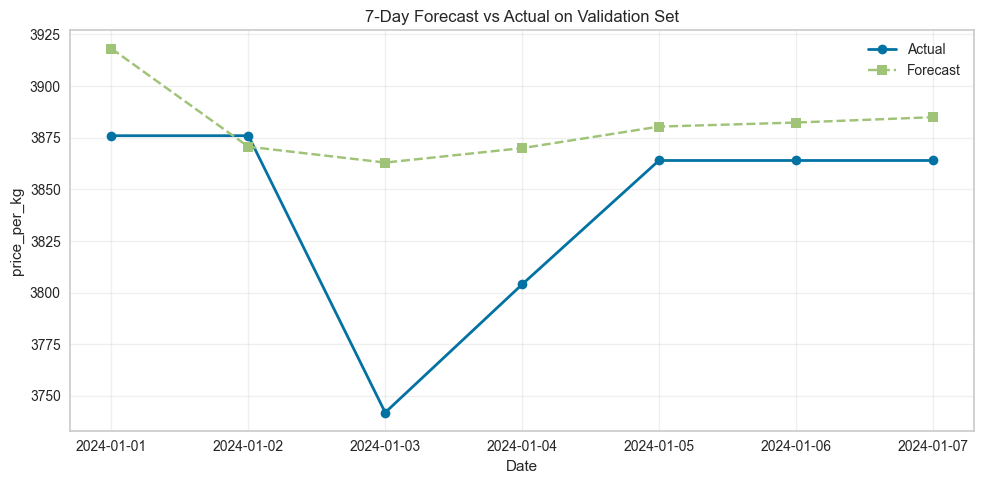

In [24]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Use the same forecast horizon as training
fh = forecast_horizon  # 7 days

# Forecast 7 days ahead using the trained model
preds_out = s.predict_model(best, fh=fh)

# Extract numeric predictions from predict_model output
if isinstance(preds_out, pd.DataFrame):
    for col in ['y_pred', 'Label', 'price_per_kg', 'Forecast', 'Prediction']:
        if col in preds_out.columns:
            preds = preds_out[col].values
            break
    else:
        preds = preds_out.iloc[:, 0].values
else:
    preds = np.array(preds_out)

# Get actual values for the same period (first 7 days of validation)
y_true = validate['price_per_kg'].iloc[:fh].values

# Compute metrics
mae = mean_absolute_error(y_true, preds)
rmse = mean_squared_error(y_true, preds, squared=False)
mape = np.mean(np.abs((y_true - preds) / y_true)) * 100

print(f"7-Day Forecast Validation: MAE={mae:.3f}, RMSE={rmse:.3f}, MAPE={mape:.2f}%")

# Plot actual vs forecast for the 7-day horizon
plt.figure(figsize=(10, 5))
plt.plot(validate.index[:fh], y_true, marker='o', label='Actual', linewidth=2)
plt.plot(validate.index[:fh], preds, marker='s', linestyle='--', label='Forecast')
plt.legend()
plt.title(f'{fh}-Day Forecast vs Actual on Validation Set')
plt.xlabel('Date')
plt.ylabel('price_per_kg')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Running walk-forward validation with 52 windows of 7 days each...
(This retrains the model at each step for accurate evaluation)

Window 1/52 done - Dates: 2024-01-01 to 2024-01-07
Window 1/52 done - Dates: 2024-01-01 to 2024-01-07
Window 2/52 done - Dates: 2024-01-08 to 2024-01-14
Window 2/52 done - Dates: 2024-01-08 to 2024-01-14
Window 3/52 done - Dates: 2024-01-15 to 2024-01-21
Window 3/52 done - Dates: 2024-01-15 to 2024-01-21
Window 4/52 done - Dates: 2024-01-22 to 2024-01-28
Window 4/52 done - Dates: 2024-01-22 to 2024-01-28
Window 5/52 done - Dates: 2024-01-29 to 2024-02-04
Window 5/52 done - Dates: 2024-01-29 to 2024-02-04
Window 6/52 done - Dates: 2024-02-05 to 2024-02-11
Window 6/52 done - Dates: 2024-02-05 to 2024-02-11
Window 7/52 done - Dates: 2024-02-12 to 2024-02-18
Window 7/52 done - Dates: 2024-02-12 to 2024-02-18
Window 8/52 done - Dates: 2024-02-19 to 2024-02-25
Window 8/52 done - Dates: 2024-02-19 to 2024-02-25
Window 9/52 done - Dates: 2024-02-26 to 2024-03-03
Win

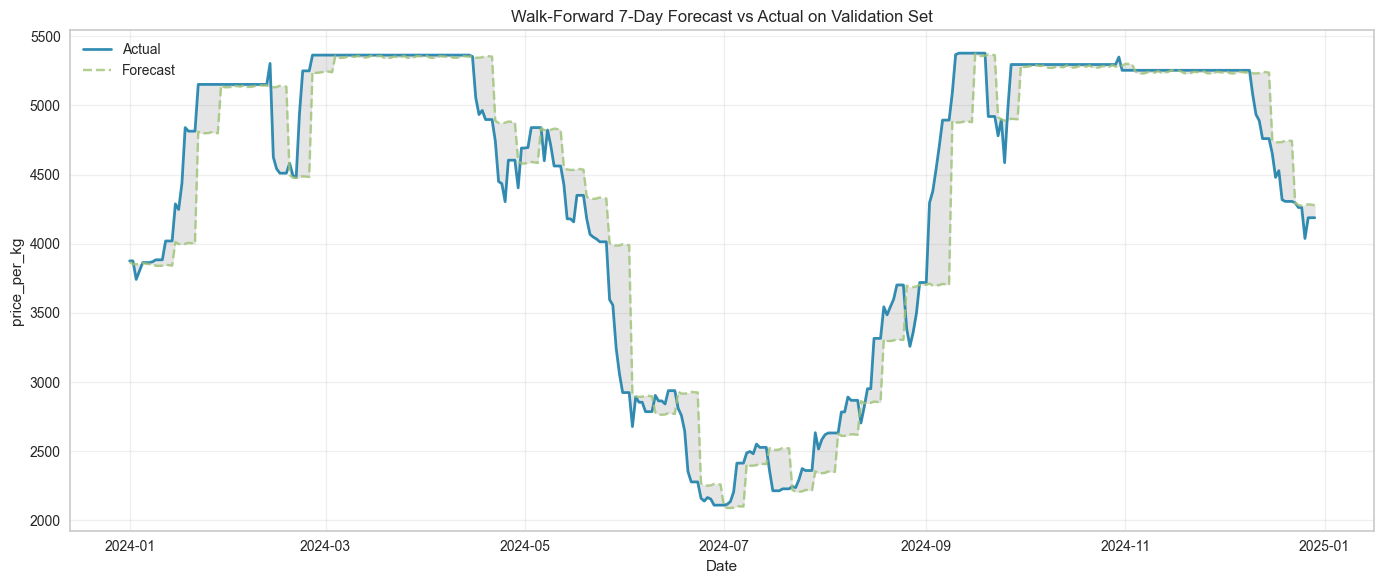


=== Per-Window Metrics ===
Window 1: MAE=30.529, MAPE=0.81%
Window 2: MAE=95.354, MAPE=2.39%
Window 3: MAE=605.277, MAPE=12.87%
Window 4: MAE=349.991, MAPE=6.79%
Window 5: MAE=14.932, MAPE=0.29%
Window 6: MAE=10.922, MAPE=0.21%
Window 7: MAE=451.840, MAPE=9.88%
Window 8: MAE=408.265, MAPE=7.90%
Window 9: MAE=122.459, MAPE=2.28%
Window 10: MAE=13.339, MAPE=0.25%
Window 11: MAE=10.645, MAPE=0.20%
Window 12: MAE=15.296, MAPE=0.29%
Window 13: MAE=12.310, MAPE=0.23%
Window 14: MAE=12.861, MAPE=0.24%
Window 15: MAE=12.630, MAPE=0.24%
Window 16: MAE=351.689, MAPE=7.13%
Window 17: MAE=344.826, MAPE=7.70%
Window 18: MAE=183.475, MAPE=3.88%
Window 19: MAE=163.523, MAPE=3.57%
Window 20: MAE=253.999, MAPE=5.98%
Window 21: MAE=276.918, MAPE=6.85%
Window 22: MAE=816.160, MAPE=26.60%
Window 23: MAE=94.555, MAPE=3.43%
Window 24: MAE=128.150, MAPE=4.41%
Window 25: MAE=437.448, MAPE=18.54%
Window 26: MAE=123.359, MAPE=5.79%
Window 27: MAE=161.601, MAPE=6.82%
Window 28: MAE=111.701, MAPE=4.43%
Window 29

In [25]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.base import clone

# Walk-forward validation: retrain model at each step to get proper rolling forecasts
fh = forecast_horizon  # 7 days

all_preds = []
all_actuals = []
forecast_dates = []

# Number of rolling windows
n_windows = len(validate) // fh

print(f"Running walk-forward validation with {n_windows} windows of {fh} days each...")
print("(This retrains the model at each step for accurate evaluation)\n")

for i in range(n_windows):
    start_idx = i * fh
    end_idx = start_idx + fh
    
    # Expanding training set: train + validation data up to current window
    if i == 0:
        train_expanded = train.copy()
    else:
        # Include previous validation windows in training
        train_expanded = pd.concat([train, validate.iloc[:start_idx]])
    
    # Ensure daily frequency
    train_expanded = train_expanded.asfreq('D')
    train_expanded = train_expanded.ffill().bfill()
    
    # Get actual values for this window
    y_true_window = validate['price_per_kg'].iloc[start_idx:end_idx].values
    dates_window = validate.index[start_idx:end_idx]
    
    all_actuals.extend(y_true_window)
    forecast_dates.extend(dates_window)
    
    # Setup on expanded training set (silent mode)
    s_temp = setup(
        data=train_expanded,
        fh=fh,
        fold=2,
        session_id=42,
        seasonal_period=7,
        target='price_per_kg',
        verbose=False
    )
    
    # Clone and fit the best model on new data
    model_temp = clone(best)
    y_train = train_expanded['price_per_kg']
    model_temp.fit(y_train)
    
    # Forecast
    preds_window = model_temp.predict(fh=list(range(1, fh + 1)))
    
    # Convert to numpy array
    if hasattr(preds_window, 'values'):
        preds_window = preds_window.values
    
    all_preds.extend(preds_window)
    
    # Progress
    print(f"Window {i+1}/{n_windows} done - Dates: {dates_window[0].strftime('%Y-%m-%d')} to {dates_window[-1].strftime('%Y-%m-%d')}")

# Convert to arrays
all_preds = np.array(all_preds)
all_actuals = np.array(all_actuals)

# Overall metrics
mae = mean_absolute_error(all_actuals, all_preds)
rmse = mean_squared_error(all_actuals, all_preds, squared=False)
mape = np.mean(np.abs((all_actuals - all_preds) / all_actuals)) * 100

print(f"\n{'='*50}")
print(f"=== Overall Validation Results ({n_windows * fh} days) ===")
print(f"{'='*50}")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(forecast_dates, all_actuals, label='Actual', linewidth=2, alpha=0.8)
plt.plot(forecast_dates, all_preds, label='Forecast', linestyle='--', alpha=0.8)
plt.fill_between(forecast_dates, all_actuals, all_preds, alpha=0.2, color='gray')
plt.legend()
plt.title(f'Walk-Forward {fh}-Day Forecast vs Actual on Validation Set')
plt.xlabel('Date')
plt.ylabel('price_per_kg')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Per-window breakdown
print(f"\n=== Per-Window Metrics ===")
for i in range(n_windows):
    start_idx = i * fh
    end_idx = start_idx + fh
    y_w = all_actuals[start_idx:end_idx]
    p_w = all_preds[start_idx:end_idx]
    mae_w = mean_absolute_error(y_w, p_w)
    mape_w = np.mean(np.abs((y_w - p_w) / y_w)) * 100
    print(f"Window {i+1}: MAE={mae_w:.3f}, MAPE={mape_w:.2f}%")

## Try other models, Prophet, Neural Prophet

In [1]:
import pandas as pd

# Load preprocessed data
train = pd.read_csv('data/train.csv', index_col=0, parse_dates=True)
validate = pd.read_csv('data/validate.csv', index_col=0, parse_dates=True)
test = pd.read_csv('data/test.csv', index_col=0, parse_dates=True)

# Or load the full dataset
df_clean = pd.read_csv('data/df_clean.csv', index_col=0, parse_dates=True)

forecast_horizon = 7  # from config.txt

### Prophet Model

c:\Users\lodes\miniconda3\envs\prophet_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


✅ Prophet loaded successfully
Running Prophet walk-forward validation with 52 windows of 7 days each...

Window 1/52 done - Dates: 2024-01-01 to 2024-01-07
Window 1/52 done - Dates: 2024-01-01 to 2024-01-07
Window 2/52 done - Dates: 2024-01-08 to 2024-01-14
Window 2/52 done - Dates: 2024-01-08 to 2024-01-14
Window 3/52 done - Dates: 2024-01-15 to 2024-01-21
Window 3/52 done - Dates: 2024-01-15 to 2024-01-21
Window 4/52 done - Dates: 2024-01-22 to 2024-01-28
Window 4/52 done - Dates: 2024-01-22 to 2024-01-28
Window 5/52 done - Dates: 2024-01-29 to 2024-02-04
Window 5/52 done - Dates: 2024-01-29 to 2024-02-04
Window 6/52 done - Dates: 2024-02-05 to 2024-02-11
Window 6/52 done - Dates: 2024-02-05 to 2024-02-11
Window 7/52 done - Dates: 2024-02-12 to 2024-02-18
Window 7/52 done - Dates: 2024-02-12 to 2024-02-18
Window 8/52 done - Dates: 2024-02-19 to 2024-02-25
Window 8/52 done - Dates: 2024-02-19 to 2024-02-25
Window 9/52 done - Dates: 2024-02-26 to 2024-03-03
Window 9/52 done - Dates: 20

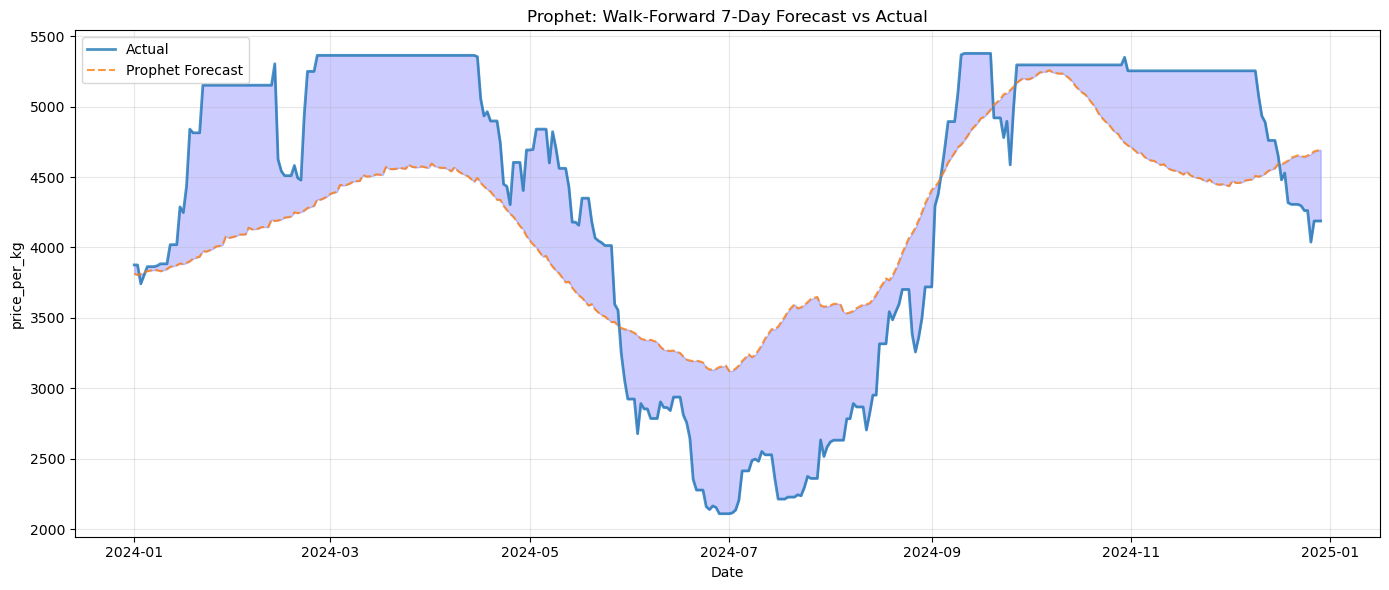

In [2]:
# Prophet Model - with import error handling
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

PROPHET_AVAILABLE = False
try:
    from prophet import Prophet
    # Test if Prophet initializes correctly
    _test_model = Prophet()
    del _test_model
    PROPHET_AVAILABLE = True
    print("✅ Prophet loaded successfully")
except (ImportError, AttributeError) as e:
    print(f"⚠️ Prophet not available or broken: {e}")
    print("   To fix, run in terminal:")
    print("   conda activate prophet_env")
    print("   pip install cmdstanpy prophet --upgrade --force-reinstall")
    print("   python -c \"import cmdstanpy; cmdstanpy.install_cmdstan()\"")
    print("   Then RESTART the notebook kernel.")

if PROPHET_AVAILABLE:
    # Prepare data for Prophet (requires 'ds' and 'y' columns)
    def prepare_prophet_data(df):
        prophet_df = df[['price_per_kg']].reset_index()
        prophet_df.columns = ['ds', 'y']
        return prophet_df

    # Walk-forward validation with Prophet
    fh = forecast_horizon
    all_preds_prophet = []
    all_actuals_prophet = []
    forecast_dates_prophet = []

    n_windows = len(validate) // fh

    print(f"Running Prophet walk-forward validation with {n_windows} windows of {fh} days each...\n")

    # Suppress cmdstanpy logging
    import logging
    logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
    logging.getLogger('prophet').setLevel(logging.WARNING)

    for i in range(n_windows):
        start_idx = i * fh
        end_idx = start_idx + fh
        
        # Expanding training set
        if i == 0:
            train_expanded = train.copy()
        else:
            train_expanded = pd.concat([train, validate.iloc[:start_idx]])
        
        # Prepare data for Prophet
        train_prophet = prepare_prophet_data(train_expanded)
        
        # Get actual values
        y_true_window = validate['price_per_kg'].iloc[start_idx:end_idx].values
        dates_window = validate.index[start_idx:end_idx]
        
        all_actuals_prophet.extend(y_true_window)
        forecast_dates_prophet.extend(dates_window)
        
        # Train Prophet model
        model_prophet = Prophet(
            daily_seasonality=False,
            weekly_seasonality=True,
            yearly_seasonality=True,
            changepoint_prior_scale=0.05
        )
        model_prophet.fit(train_prophet)
        
        # Create future dataframe and predict
        future = model_prophet.make_future_dataframe(periods=fh)
        forecast = model_prophet.predict(future)
        
        # Get predictions for the forecast horizon
        preds_window = forecast['yhat'].iloc[-fh:].values
        all_preds_prophet.extend(preds_window)
        
        print(f"Window {i+1}/{n_windows} done - Dates: {dates_window[0].strftime('%Y-%m-%d')} to {dates_window[-1].strftime('%Y-%m-%d')}")

    # Convert to arrays
    all_preds_prophet = np.array(all_preds_prophet)
    all_actuals_prophet = np.array(all_actuals_prophet)

    # Overall metrics
    mae_prophet = mean_absolute_error(all_actuals_prophet, all_preds_prophet)
    rmse_prophet = np.sqrt(mean_squared_error(all_actuals_prophet, all_preds_prophet))
    mape_prophet = np.mean(np.abs((all_actuals_prophet - all_preds_prophet) / all_actuals_prophet)) * 100

    print(f"\n{'='*50}")
    print(f"=== Prophet Validation Results ({n_windows * fh} days) ===")
    print(f"{'='*50}")
    print(f"MAE:  {mae_prophet:.3f}")
    print(f"RMSE: {rmse_prophet:.3f}")
    print(f"MAPE: {mape_prophet:.2f}%")

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(forecast_dates_prophet, all_actuals_prophet, label='Actual', linewidth=2, alpha=0.8)
    plt.plot(forecast_dates_prophet, all_preds_prophet, label='Prophet Forecast', linestyle='--', alpha=0.8)
    plt.fill_between(forecast_dates_prophet, all_actuals_prophet, all_preds_prophet, alpha=0.2, color='blue')
    plt.legend()
    plt.title(f'Prophet: Walk-Forward {fh}-Day Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel('price_per_kg')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    mae_prophet = rmse_prophet = mape_prophet = None
    all_preds_prophet = all_actuals_prophet = forecast_dates_prophet = []

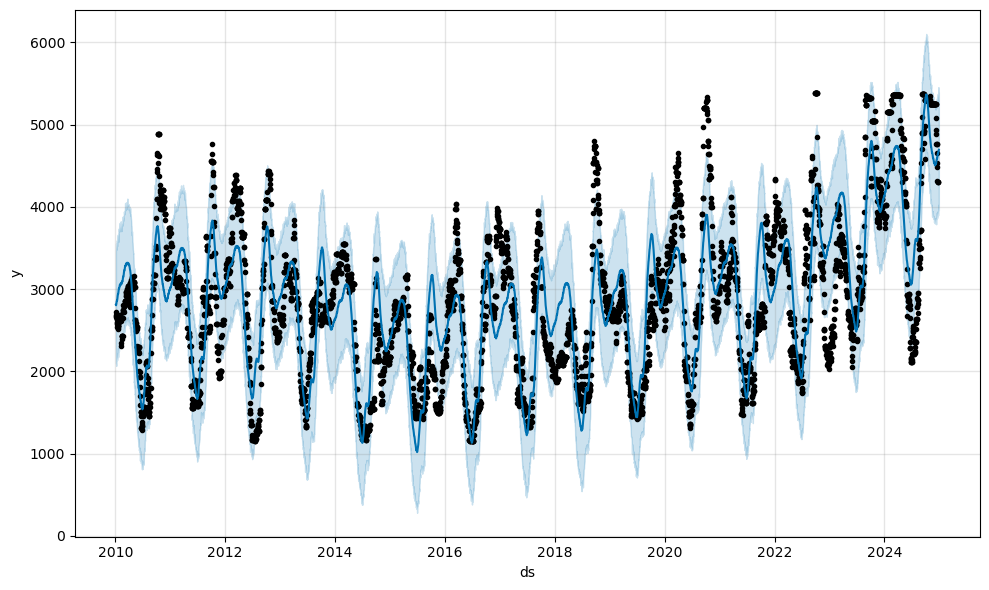

In [3]:
fig = model_prophet.plot(forecast)

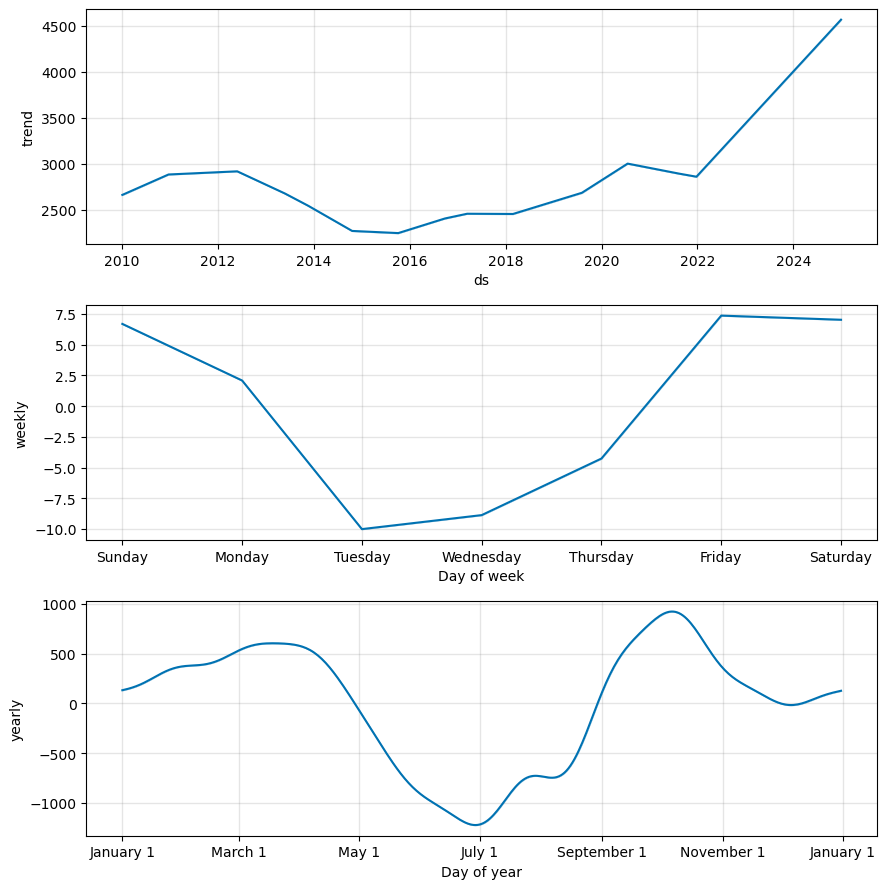

In [4]:
fig = model_prophet.plot_components(forecast)

### NeuralProphet Model

In [2]:
# NeuralProphet Model - with import error handling
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
## neuralprophet warning error
import warnings
warnings.filterwarnings('ignore')

try:
    from neuralprophet import NeuralProphet, set_log_level
    set_log_level("ERROR")
    NEURALPROPHET_AVAILABLE = True
except ImportError:
    print("⚠️ NeuralProphet not available. Install with: pip install neuralprophet")
    print("   Note: NeuralProphet may conflict with PyCaret dependencies.")
    print("   Consider using a separate conda environment for NeuralProphet.")
    NEURALPROPHET_AVAILABLE = False

if NEURALPROPHET_AVAILABLE:
    # Walk-forward validation with NeuralProphet
    fh = forecast_horizon
    all_preds_nprophet = []
    all_actuals_nprophet = []
    forecast_dates_nprophet = []

    n_windows = len(validate) // fh

    print(f"Running NeuralProphet walk-forward validation with {n_windows} windows of {fh} days each...\n")

    for i in range(n_windows):
        start_idx = i * fh
        end_idx = start_idx + fh
        
        # Expanding training set
        if i == 0:
            train_expanded = train.copy()
        else:
            train_expanded = pd.concat([train, validate.iloc[:start_idx]])
        
        # Prepare data for NeuralProphet (same format as Prophet)
        train_np = train_expanded[['price_per_kg']].reset_index()
        train_np.columns = ['ds', 'y']
        
        # Get actual values
        y_true_window = validate['price_per_kg'].iloc[start_idx:end_idx].values
        dates_window = validate.index[start_idx:end_idx]
        
        all_actuals_nprophet.extend(y_true_window)
        forecast_dates_nprophet.extend(dates_window)
        
        # Train NeuralProphet model
        model_np = NeuralProphet(
            n_forecasts=fh,
            n_lags=7,
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            learning_rate=0.1,
            epochs=100,
            batch_size=32,
        )
        model_np.fit(train_np, freq='D')
        
        # Predict - use the last row of training data to forecast forward
        future = model_np.make_future_dataframe(train_np, periods=0, n_historic_predictions=1)
        forecast = model_np.predict(future)
        
        # Extract predictions for the forecast horizon
        # NeuralProphet stores multi-step forecasts in columns: yhat1, yhat2, ..., yhatN
        preds_window = []
        for step in range(1, fh + 1):
            col_name = f'yhat{step}'
            if col_name in forecast.columns:
                # Get the last non-NaN value for this step
                val = forecast[col_name].dropna().iloc[-1]
                preds_window.append(val)
            else:
                # Fallback: use yhat if individual steps not available
                if 'yhat' in forecast.columns:
                    preds_window.append(forecast['yhat'].dropna().iloc[-1])
        
        # If we didn't get enough predictions, try alternative extraction
        if len(preds_window) < fh:
            yhat_cols = sorted([c for c in forecast.columns if c.startswith('yhat')], 
                              key=lambda x: int(x.replace('yhat', '')) if x != 'yhat' else 0)
            preds_window = forecast[yhat_cols].dropna().iloc[-1].values[:fh].tolist()
        
            all_preds_nprophet.extend(preds_window[:fh])  # Ensure exactly fh predictions
            
            print(f"Window {i+1}/{n_windows} done - Dates: {dates_window[0].strftime('%Y-%m-%d')} to {dates_window[-1].strftime('%Y-%m-%d')}")
            # Convert to arrays
            all_preds_nprophet = np.array(all_preds_nprophet)
            all_actuals_nprophet = np.array(all_actuals_nprophet)

            # Verify lengths match
            min_len = min(len(all_preds_nprophet), len(all_actuals_nprophet))
            all_preds_nprophet = all_preds_nprophet[:min_len]
            all_actuals_nprophet = all_actuals_nprophet[:min_len]
            forecast_dates_nprophet = forecast_dates_nprophet[:min_len]

            # Overall metrics
            mae_nprophet = mean_absolute_error(all_actuals_nprophet, all_preds_nprophet)
            rmse_nprophet = np.sqrt(mean_squared_error(all_actuals_nprophet, all_preds_nprophet))
            mape_nprophet = np.mean(np.abs((all_actuals_nprophet - all_preds_nprophet) / all_actuals_nprophet)) * 100

            print(f"\n{'='*50}")
            print(f"=== NeuralProphet Validation Results ({min_len} days) ===")
            print(f"{'='*50}")
            print(f"MAE:  {mae_nprophet:.3f}")
            print(f"RMSE: {rmse_nprophet:.3f}")
            print(f"MAPE: {mape_nprophet:.2f}%")

            # Plot
            plt.figure(figsize=(14, 6))
            plt.plot(forecast_dates_nprophet, all_actuals_nprophet, label='Actual', linewidth=2, alpha=0.8)
            plt.plot(forecast_dates_nprophet, all_preds_nprophet, label='NeuralProphet Forecast', linestyle='--', alpha=0.8)
            plt.fill_between(forecast_dates_nprophet, all_actuals_nprophet, all_preds_nprophet, alpha=0.2, color='green')
            plt.legend()
            plt.title(f'NeuralProphet: Walk-Forward {fh}-Day Forecast vs Actual')
            plt.xlabel('Date')
            plt.ylabel('price_per_kg')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            mae_nprophet = rmse_nprophet = mape_nprophet = None
            all_preds_nprophet = all_actuals_nprophet = forecast_dates_nprophet = []

   

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


Running NeuralProphet walk-forward validation with 52 windows of 7 days each...

Training: |          | 0/? [01:29<?, ?it/s, v_num=54, train_loss=0.00564, reg_loss=0.000, MAE=137.0, RMSE=203.0, Loss=0.00563, RegLoss=0.000]



ValueError: Dataframe has less than n_forecasts + n_lags rows. Forecasting not possible. Please either use a larger dataset, or adjust the model parameters.

### Model Comparison Summary

MODEL COMPARISON - Walk-Forward Validation Results
       Model        MAE       RMSE  MAPE (%)
PyCaret Best 191.334576 304.378413  5.048122

🏆 Best Model (lowest MAPE): PyCaret Best


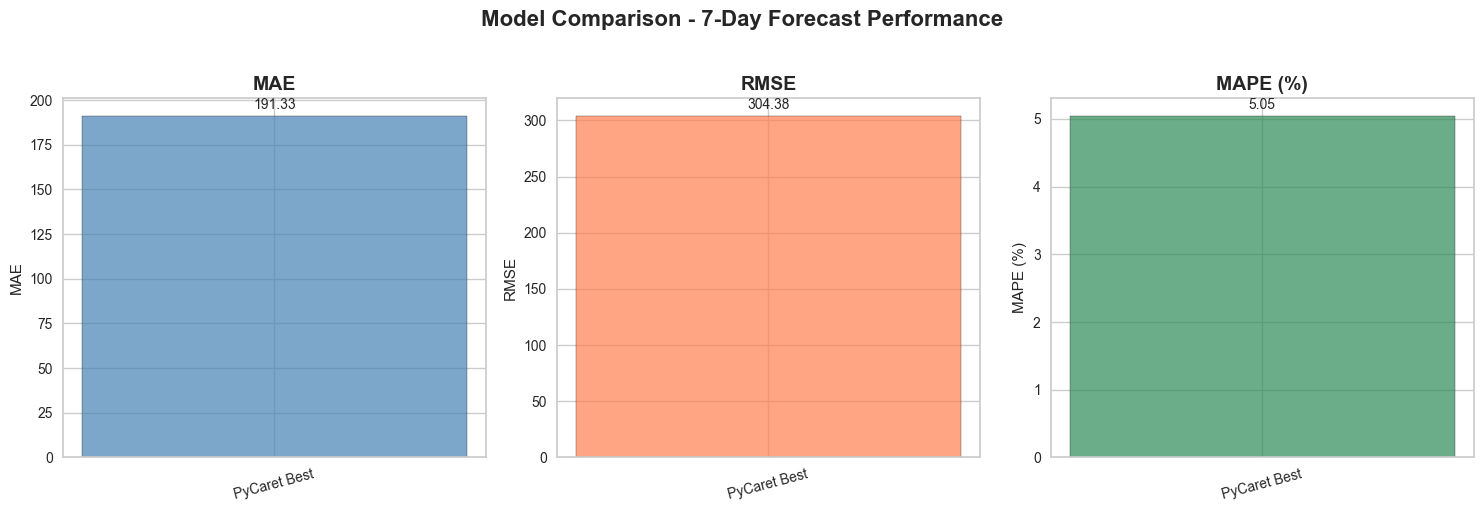

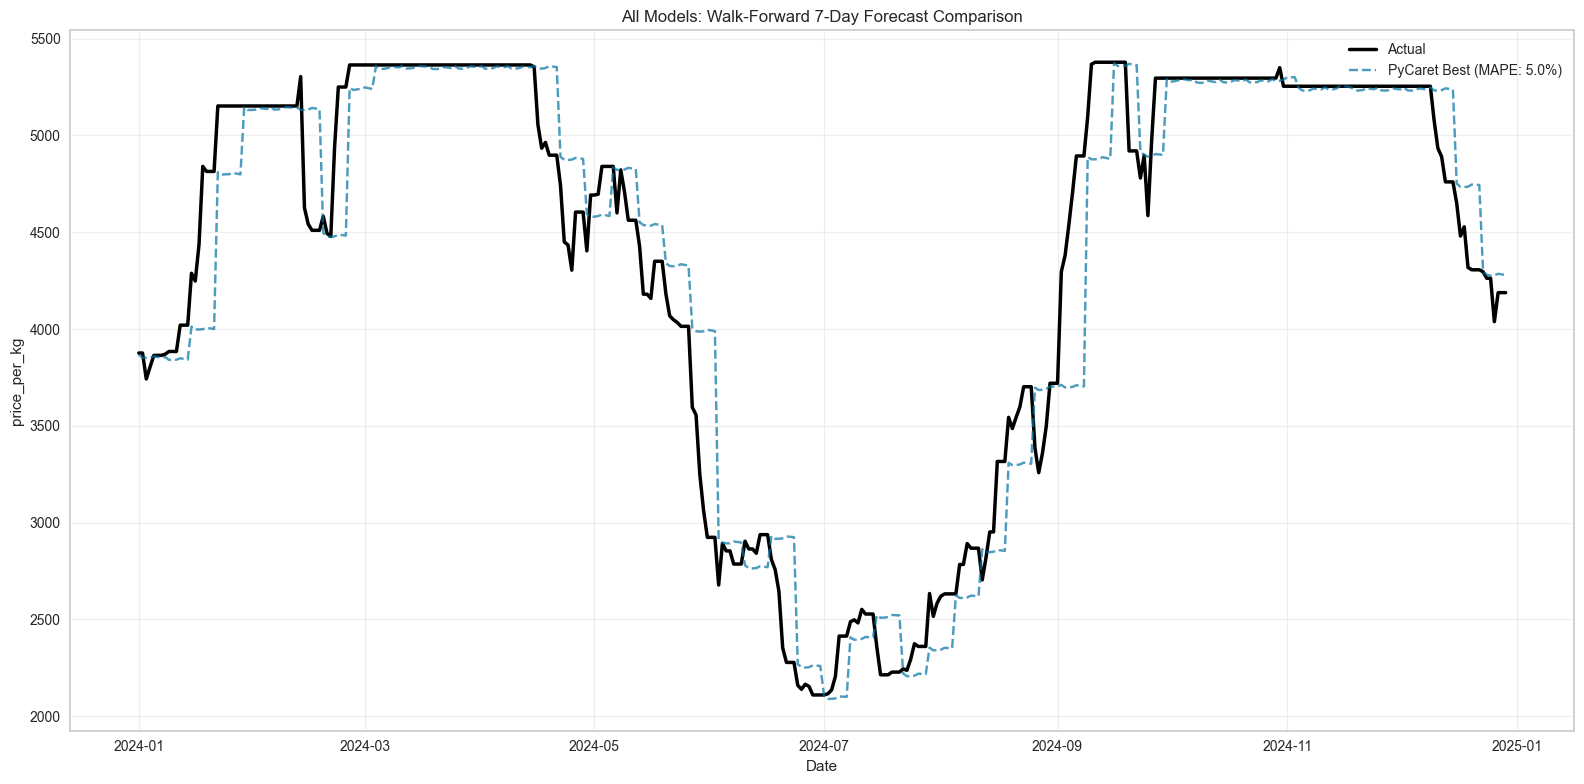

In [28]:
# Compare available models
import matplotlib.pyplot as plt

# Build comparison list with only available models
models_data = [('PyCaret Best', mae, rmse, mape)]

if mae_prophet is not None:
    models_data.append(('Prophet', mae_prophet, rmse_prophet, mape_prophet))
if mae_nprophet is not None:
    models_data.append(('NeuralProphet', mae_nprophet, rmse_nprophet, mape_nprophet))

comparison_df = pd.DataFrame(models_data, columns=['Model', 'MAE', 'RMSE', 'MAPE (%)'])

print("="*60)
print("MODEL COMPARISON - Walk-Forward Validation Results")
print("="*60)
print(comparison_df.to_string(index=False))
print("="*60)

# Highlight best model
best_model_idx = comparison_df['MAPE (%)'].idxmin()
print(f"\n🏆 Best Model (lowest MAPE): {comparison_df.loc[best_model_idx, 'Model']}")

# Visualization
n_models = len(comparison_df)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['MAE', 'RMSE', 'MAPE (%)']
colors = ['steelblue', 'coral', 'seagreen']

for ax, metric, color in zip(axes, metrics, colors):
    bars = ax.bar(comparison_df['Model'], comparison_df[metric], color=color, alpha=0.7, edgecolor='black')
    ax.set_title(metric, fontsize=14, fontweight='bold')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=15)
    
    for bar, val in zip(bars, comparison_df[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*bar.get_height(), 
                f'{val:.2f}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Model Comparison - 7-Day Forecast Performance', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Plot all forecasts together
plt.figure(figsize=(16, 8))
plt.plot(forecast_dates, all_actuals, label='Actual', linewidth=2.5, color='black')
plt.plot(forecast_dates, all_preds, label=f'PyCaret Best (MAPE: {mape:.1f}%)', linestyle='--', alpha=0.7)

if mae_prophet is not None and len(all_preds_prophet) > 0:
    plt.plot(forecast_dates_prophet, all_preds_prophet, label=f'Prophet (MAPE: {mape_prophet:.1f}%)', linestyle='-.', alpha=0.7)

if mae_nprophet is not None and len(all_preds_nprophet) > 0:
    plt.plot(forecast_dates_nprophet, all_preds_nprophet, label=f'NeuralProphet (MAPE: {mape_nprophet:.1f}%)', linestyle=':', alpha=0.7)

plt.legend(loc='upper right')
plt.title('All Models: Walk-Forward 7-Day Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('price_per_kg')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()